In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from PIL import Image

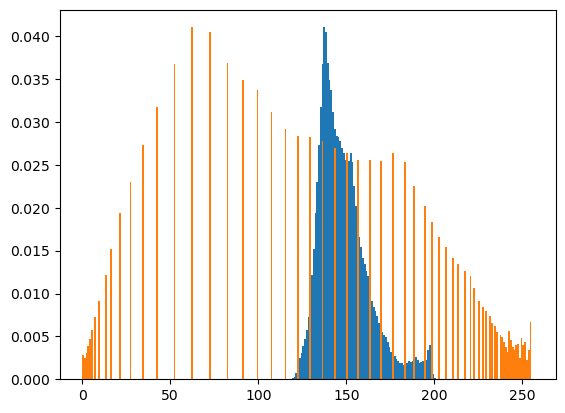

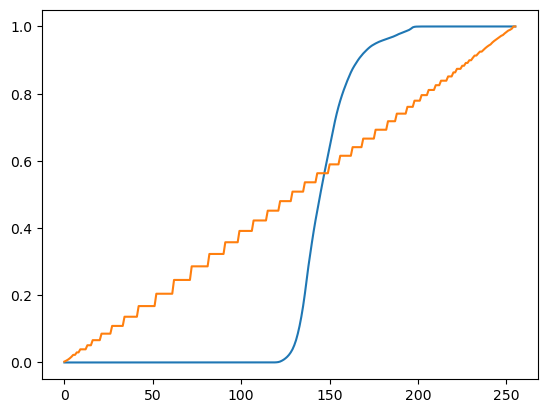

In [71]:
# https://towardsdatascience.com/histogram-equalization-5d1013626e64#:~:text=Histogram%20Equalization%20is%20a%20computer,intensity%20range%20of%20the%20image.


# histogram equalization on an arbitrary histogram
import numpy as np
def calcNormCdf(im, bins,histRange):
    # Step 1: Calculate PDF (normalize histogram by number of pixels)
    histogram, edges = np.histogram(im, bins,histRange)
    pdf = histogram / float(np.sum(histogram))
    
    # Step 2: Calculate normalized CDF
    cdf = np.cumsum(pdf)
    return cdf,pdf,edges

def histeq(im,bins=256,):
    histRange = (0,bins)
    # Step 2: Calculate normalized CDF from the pdf (hitogram normalized by number of values)
    cdf,pdf,edges = calcNormCdf(im, bins,histRange)
    # Step 3: Map intensities (pixel mapping lookup table)
    
    transform_map={}
    for i in range(cdf.shape[0]):
        transform_map[i] = int(np.floor((bins-1)* cdf[i]))
    # transform_map1= np.floor(255 * cdf).astype(np.uint8)
    # transform_map = np.round(cdf * 255)
    
    # for i in range(len (transform_map)):
    #     if transform_map1[i] != transform_map[i]:
    #         print(i)

    # STEP 4: Transformation (Create new image)

    # flatten image array into 1D list
    img_list = list(im.flatten())
    # transform pixel values to equalize
    eq_img_list = [transform_map[p] for p in img_list]
    # reshape and write back into img_array
    im_equalized = np.reshape(np.asarray(eq_img_list), im.shape)

    cdf_eq,pdf_eq,edges_eq = calcNormCdf(im_equalized, bins,histRange)

    
    return im_equalized ,(cdf,cdf_eq),(pdf,pdf_eq), (edges,edges_eq)




im = np.array(Image.open("histogram equalization/Unequalized.jpg"))
# r, g, b = im[:,:,0],im[:,:,1],im[:,:,2]
# eq_image,cdf,pdf = histeq(r)
eq_im = im.copy()
for i in range(3):
    eq_image,cdf,pdf,edges = histeq(im[:,:,i])
    eq_im[:,:,i] = eq_image


plt.figure()
plt.stairs(pdf[0], edges[0], fill=True)
plt.stairs(pdf[1], edges[1], fill=True)
plt.figure()
plt.plot(cdf[0])
plt.plot(cdf[1])
# plt.figure()
# plt.imshow(im)
# plt.figure()

# plt.imshow(eq_im)



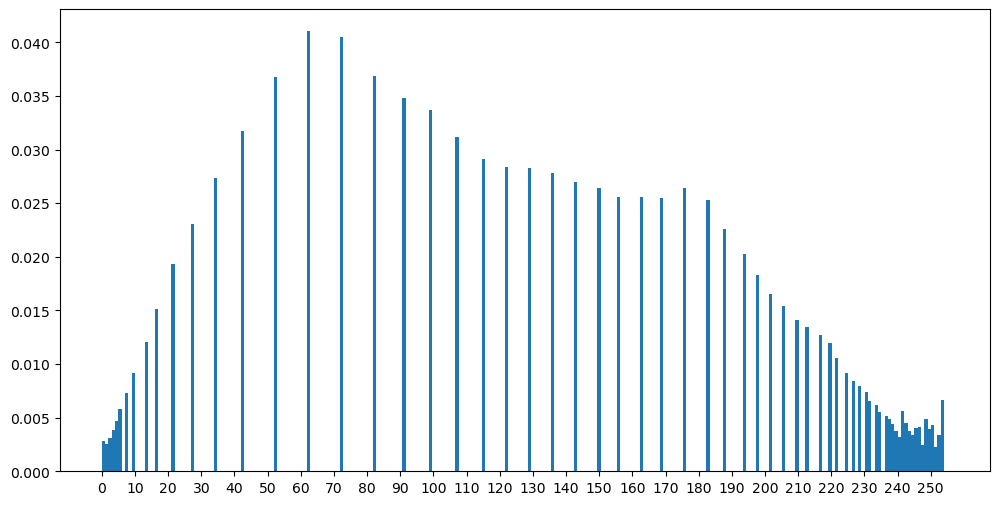

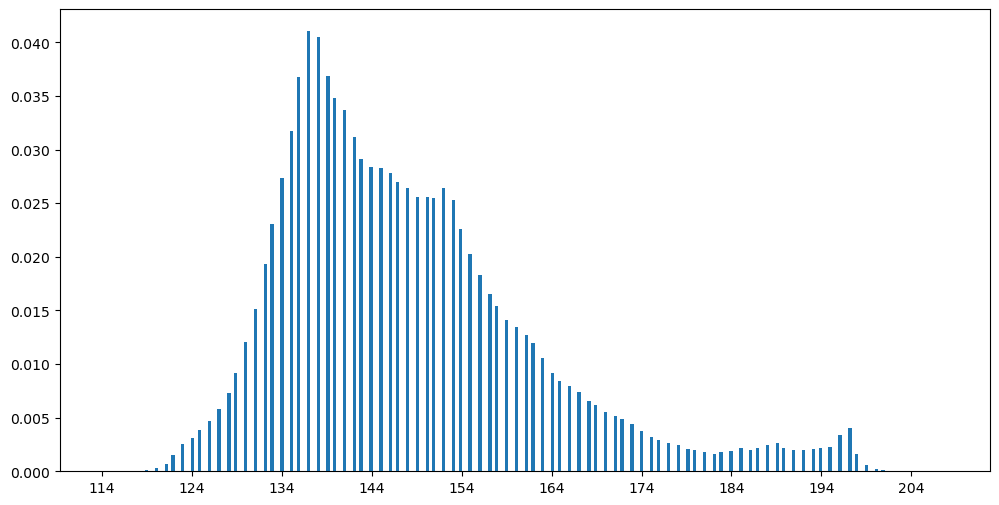

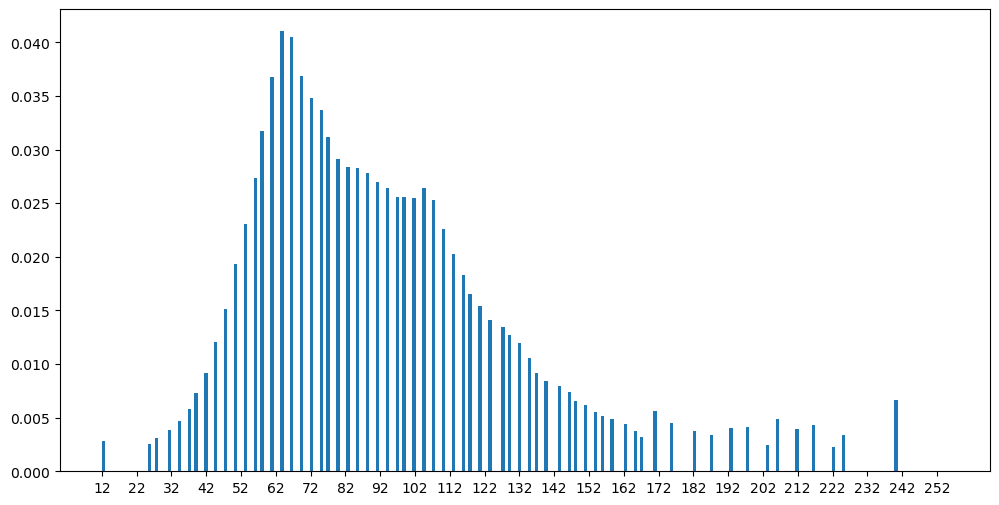

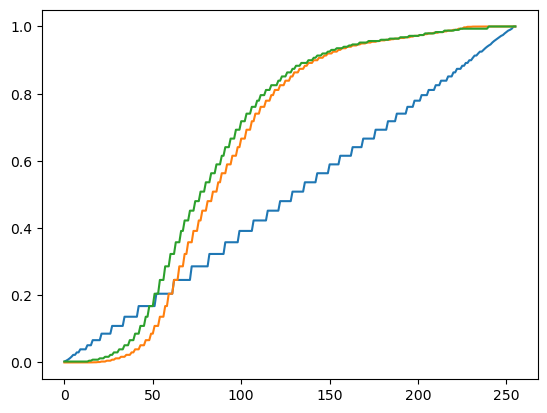

In [93]:
# https://towardsdatascience.com/histogram-equalization-5d1013626e64#:~:text=Histogram%20Equalization%20is%20a%20computer,intensity%20range%20of%20the%20image.


# histogram equalization on an arbitrary histogram
import numpy as np
def calcNormCdf(im, bins,range):
    # Step 1: Calculate PDF (normalize histogram by number of pixels)
    # histogram, edges = np.histogram(im, bins,range )
    histogram, edges = np.histogram(im,bins )
    pdf = histogram / float(np.sum(histogram))
    
    # Step 2: Calculate normalized CDF
    cdf = np.cumsum(pdf)
    return cdf,pdf,edges

def mutualHisteq(im1,im2,bins=256,):
    histRange = (0,bins)
    # Step 2: Calculate normalized CDF from the pdf (hitogram normalized by number of values)
    cdf1,pdf1,edges1 = calcNormCdf(im1, bins,histRange)
    cdf2,pdf2,edges2 = calcNormCdf(im2, bins,histRange)
    # cdf2= -np.arange(255)/255
    # Step 3: Map intensities (pixel mapping lookup table)

    transform_map_original={}
    for i in range(cdf2.shape[0]):
        transform_map_original[i] = int(np.floor(bins* cdf2[i]))
    
    transform_map1={}
    for i in range(cdf1.shape[0]):
        transform_map1[i] = int(np.floor((bins-1)* cdf1[i]))
    transform_map2_inv = {}

    transform_map2_inv = np.floor((bins-1) * cdf2).astype(int)
    transform_map2={}
    for i in np.unique(transform_map2_inv):
        arr = np.where(transform_map2_inv == i)[0]
        val = arr[int(np.round(len(arr)/2))]
        transform_map2[i] = val
    # val = 0
    # for i in range (bins):
    #     if i in transform_map2:
    #         val = transform_map2[i]
    #     else:
    #         transform_map2[i] = val
        
            
    tot = {}
    for key in transform_map1.keys(): 
        # tot[key] = transform_map2[transform_map1[key]]
        tot[transform_map2[transform_map1[key]]] = key

    # transform_map2={}
    # for i in np.unique(np.asarray(list(transform_map1.values()))):
    #     transform_map2[i] = int(np.floor(255 * cdf2[i]))
    
    # transform_map2 = np.floor(255 * cdf2).astype(np.uint8)

    # transform_map = np.round(cdf * 255)
    


    # STEP 4: Transformation (Create new image)

    # flatten image array into 1D list
    img_list = list(im1.flatten())
    # transform pixel values to equalize
    # eq_img_list = [transform_map1[p] for p in img_list]
    eq_img_list1 = [transform_map1[p] for p in img_list]
    eq_img_list2 = [transform_map2[p] for p in eq_img_list1]

    # eq_img_list2 = eq_img_list1
    # reshape and write back into img_array
    im_equalized = np.reshape(np.asarray(eq_img_list2), im2.shape)

    cdf_eq,pdf_eq,edges_eq = calcNormCdf(im_equalized,  bins,histRange)
    # histRange = (-255,255)
    
    return im_equalized ,(cdf1,cdf2,cdf_eq),(pdf1,pdf2,pdf_eq),(edges1,edges2,edges_eq)




# im = np.array(Image.open("Unequalized.jpg"))
# r, g, b = im[:,:,0],im[:,:,1],im[:,:,2]
# eq_image,cdf,pdf = histeq(r)
output_image,cdf,pdf,edges = mutualHisteq(eq_im[:,:,i],im[:,:,i],)
# output_im = im.copy()
# for i in range(3):
#     output_image,cdf,pdf,edges = mutualHisteq(eq_im[:,:,i],im[:,:,i],)
#     output_im[:,:,i] = output_image

for i in range( 3):
    plt.figure(figsize = (12,6))
    plt.xticks(np.arange(min(edges[i]), max(edges[i])+1, 10.0))
    plt.stairs(pdf[i], edges[i], fill=True)

# plt.figure(figsize = (12,6))
# plt.xticks(np.arange(min(edges[2]), max(edges[2])+1, 10.0))
# plt.stairs(pdf[0], edges[0], fill=True)
# plt.figure(figsize = (12,6))
# plt.xticks(np.arange(min(edges[2]), max(edges[2])+1, 10.0))
# plt.stairs(pdf[1], edges[1], fill=True)


plt.figure()
plt.plot(cdf[0])
plt.plot(cdf[1])
plt.plot(cdf[2])
# plt.figure()
# plt.imshow(output_im)
# plt.figure()

# plt.imshow(im)



<AxesSubplot: ylabel='Density'>

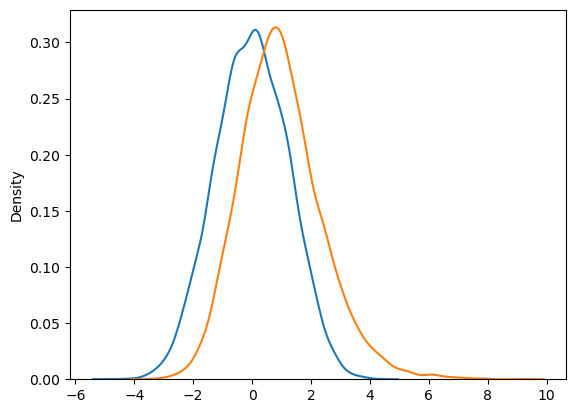

In [112]:
x = np.random.normal(loc = 0, scale = 1, size = int(1e4)) 
y1 = np.sin(500*2*np.pi*np.arange(x.shape[0])/x.shape[0])
y2 = np.random.gamma(1, 1, x.shape[0])

x1 = x + y1
x2 = x + y2

sns.kdeplot(x1)
sns.kdeplot(x2)
